In [2]:
import pygmt
import pandas as pd

In [3]:
df = pd.read_csv('data_locs.csv', sep=';')
df.head()

,Place,Country,Reason,Latitude,Longitude
0,Lomza,PL,Travel,53.176389,22.073056
1,Bauska,LV,Travel,56.408333,24.193056
2,Laagri,EST,Travel,59.351111,24.618056
3,Vantaa,FIN,Living,60.294444,25.040278
4,Espoo,FIN,Living,60.205556,24.655556


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Place      20 non-null     object 
 1   Country    20 non-null     object 
 2   Reason     20 non-null     object 
 3   Latitude   20 non-null     float64
 4   Longitude  20 non-null     float64
dtypes: float64(2), object(3)
memory usage: 928.0+ bytes


In [5]:
region = [
    df.Longitude.min() - 1,
    df.Longitude.max() + 1,
    df.Latitude.min() - 1,
    df.Latitude.max() + 1,
]

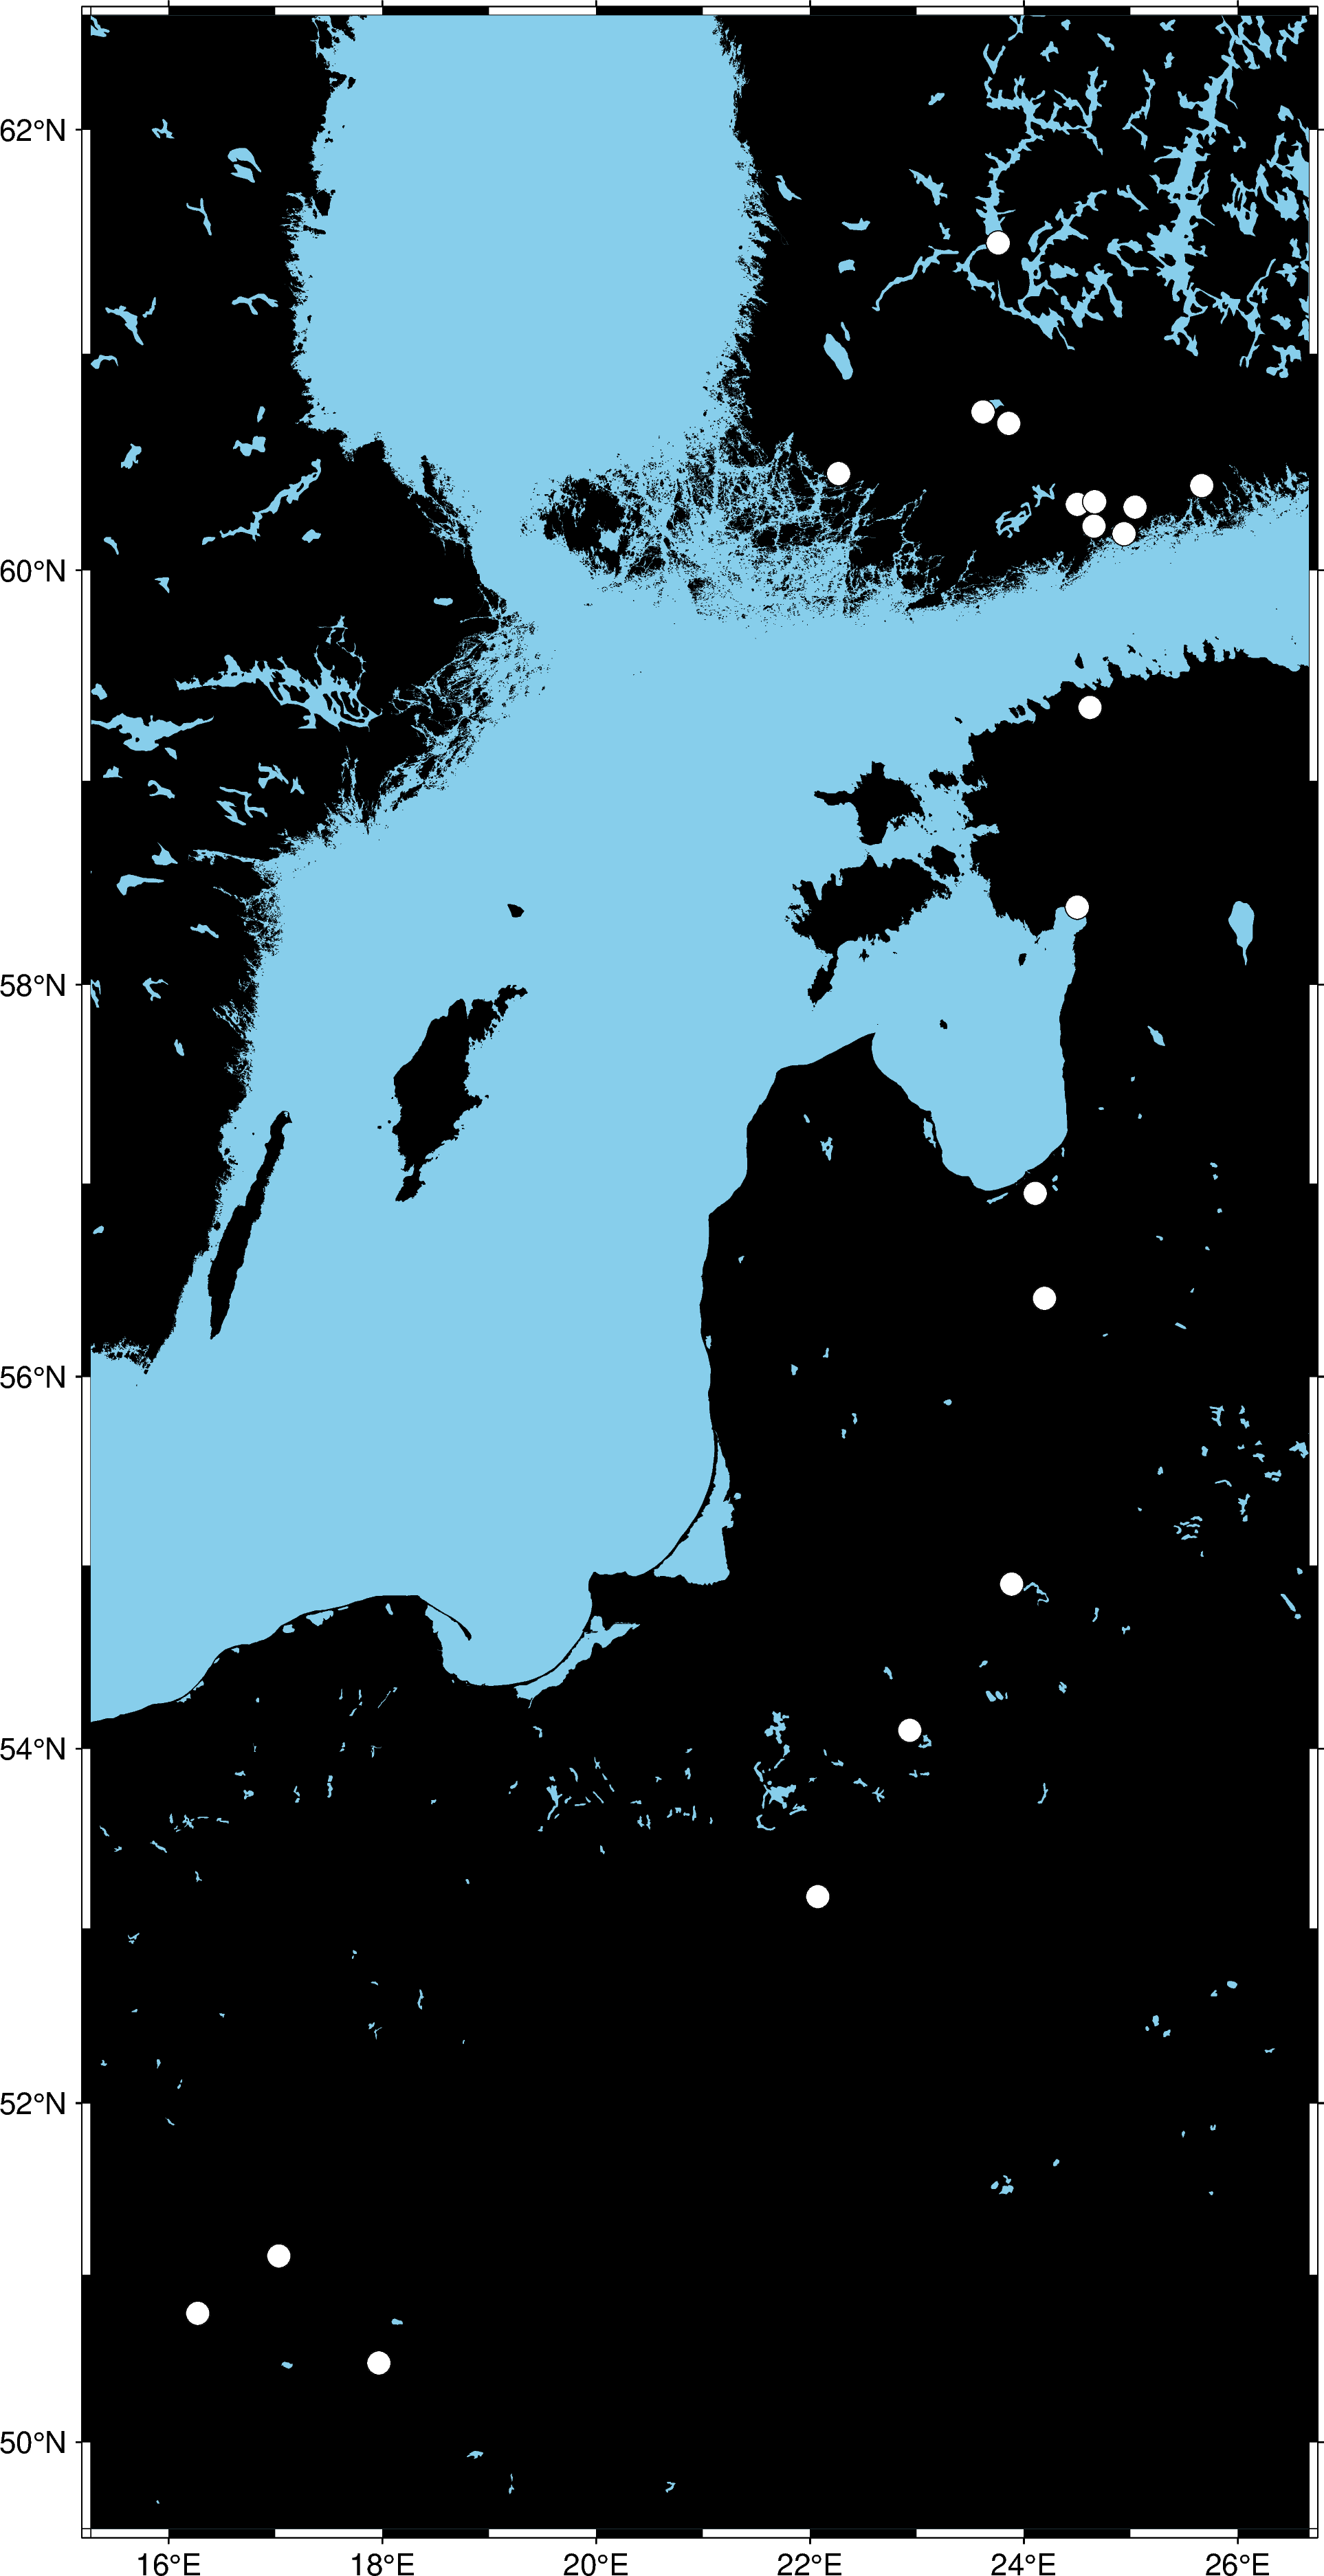

In [6]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.plot(x=df.Longitude, y=df.Latitude, style="c0.3c", fill="white", pen="black")
fig.show()

In [7]:
df['Reason'] = pd.Categorical(df['Reason'])
df['Val'] = df['Reason'].cat.codes

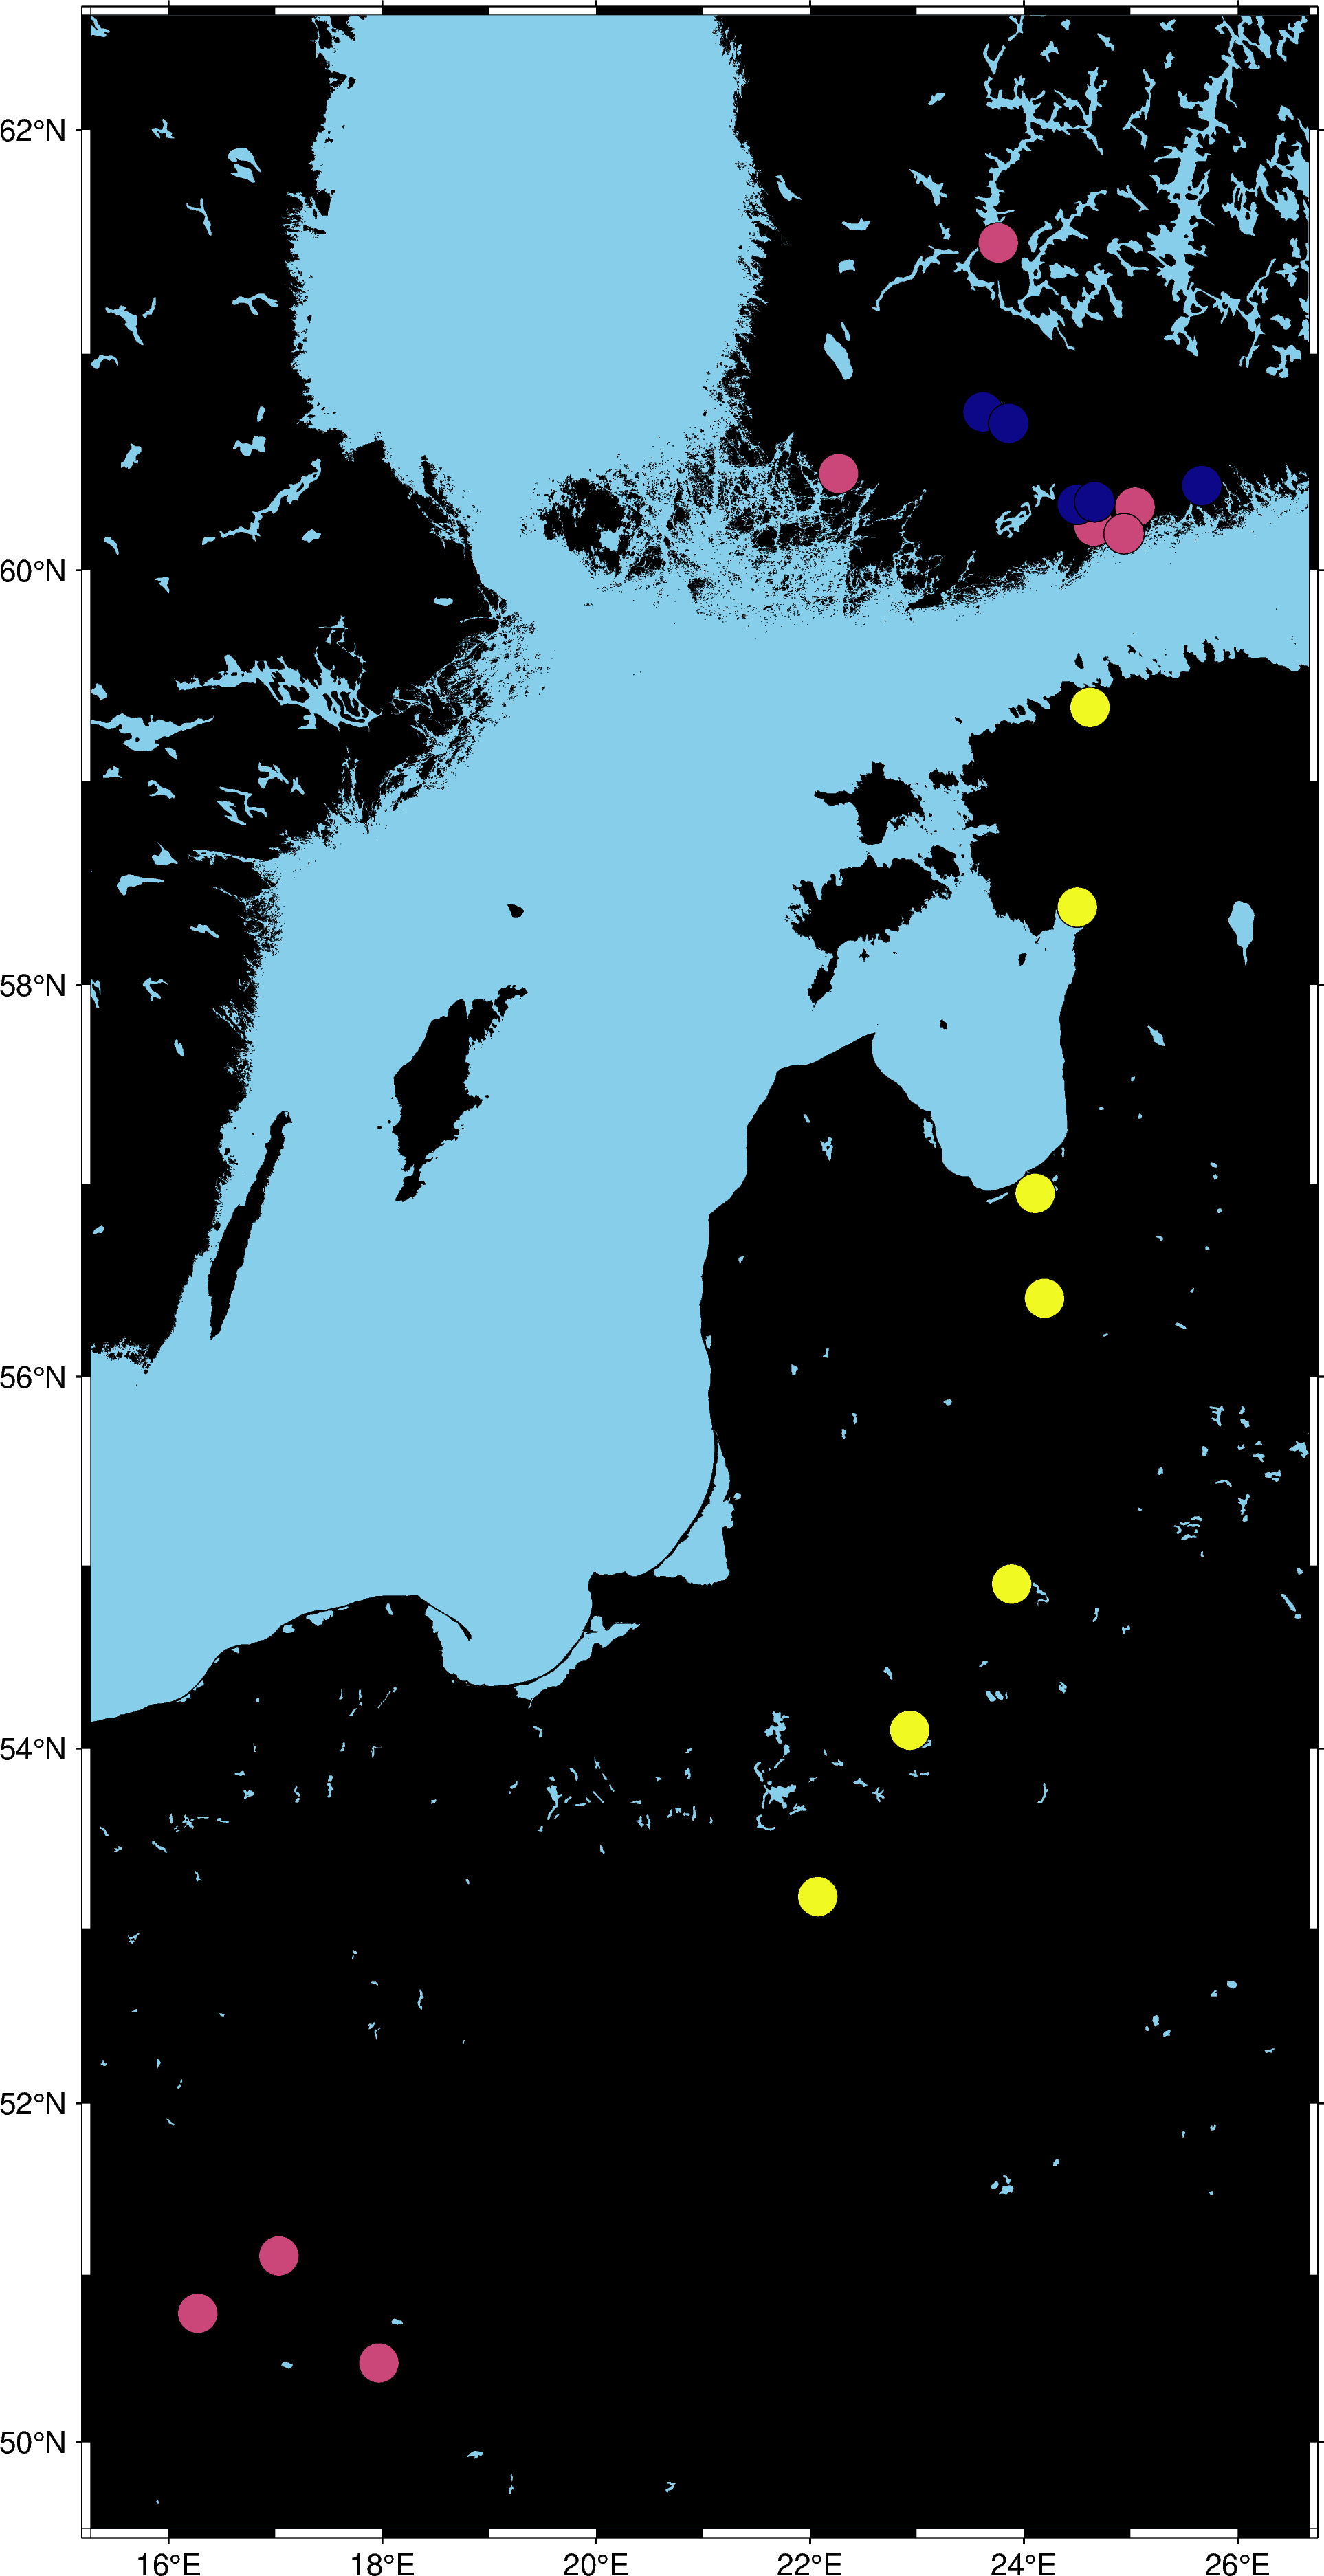

In [8]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="plasma", series=[df['Val'].min(), df['Val'].max()])
fig.plot(
    x=df.Longitude,
    y=df.Latitude,
    fill=df['Val'],
    cmap=True,
    style="c0.5c",
    pen="black",
)
fig.show()

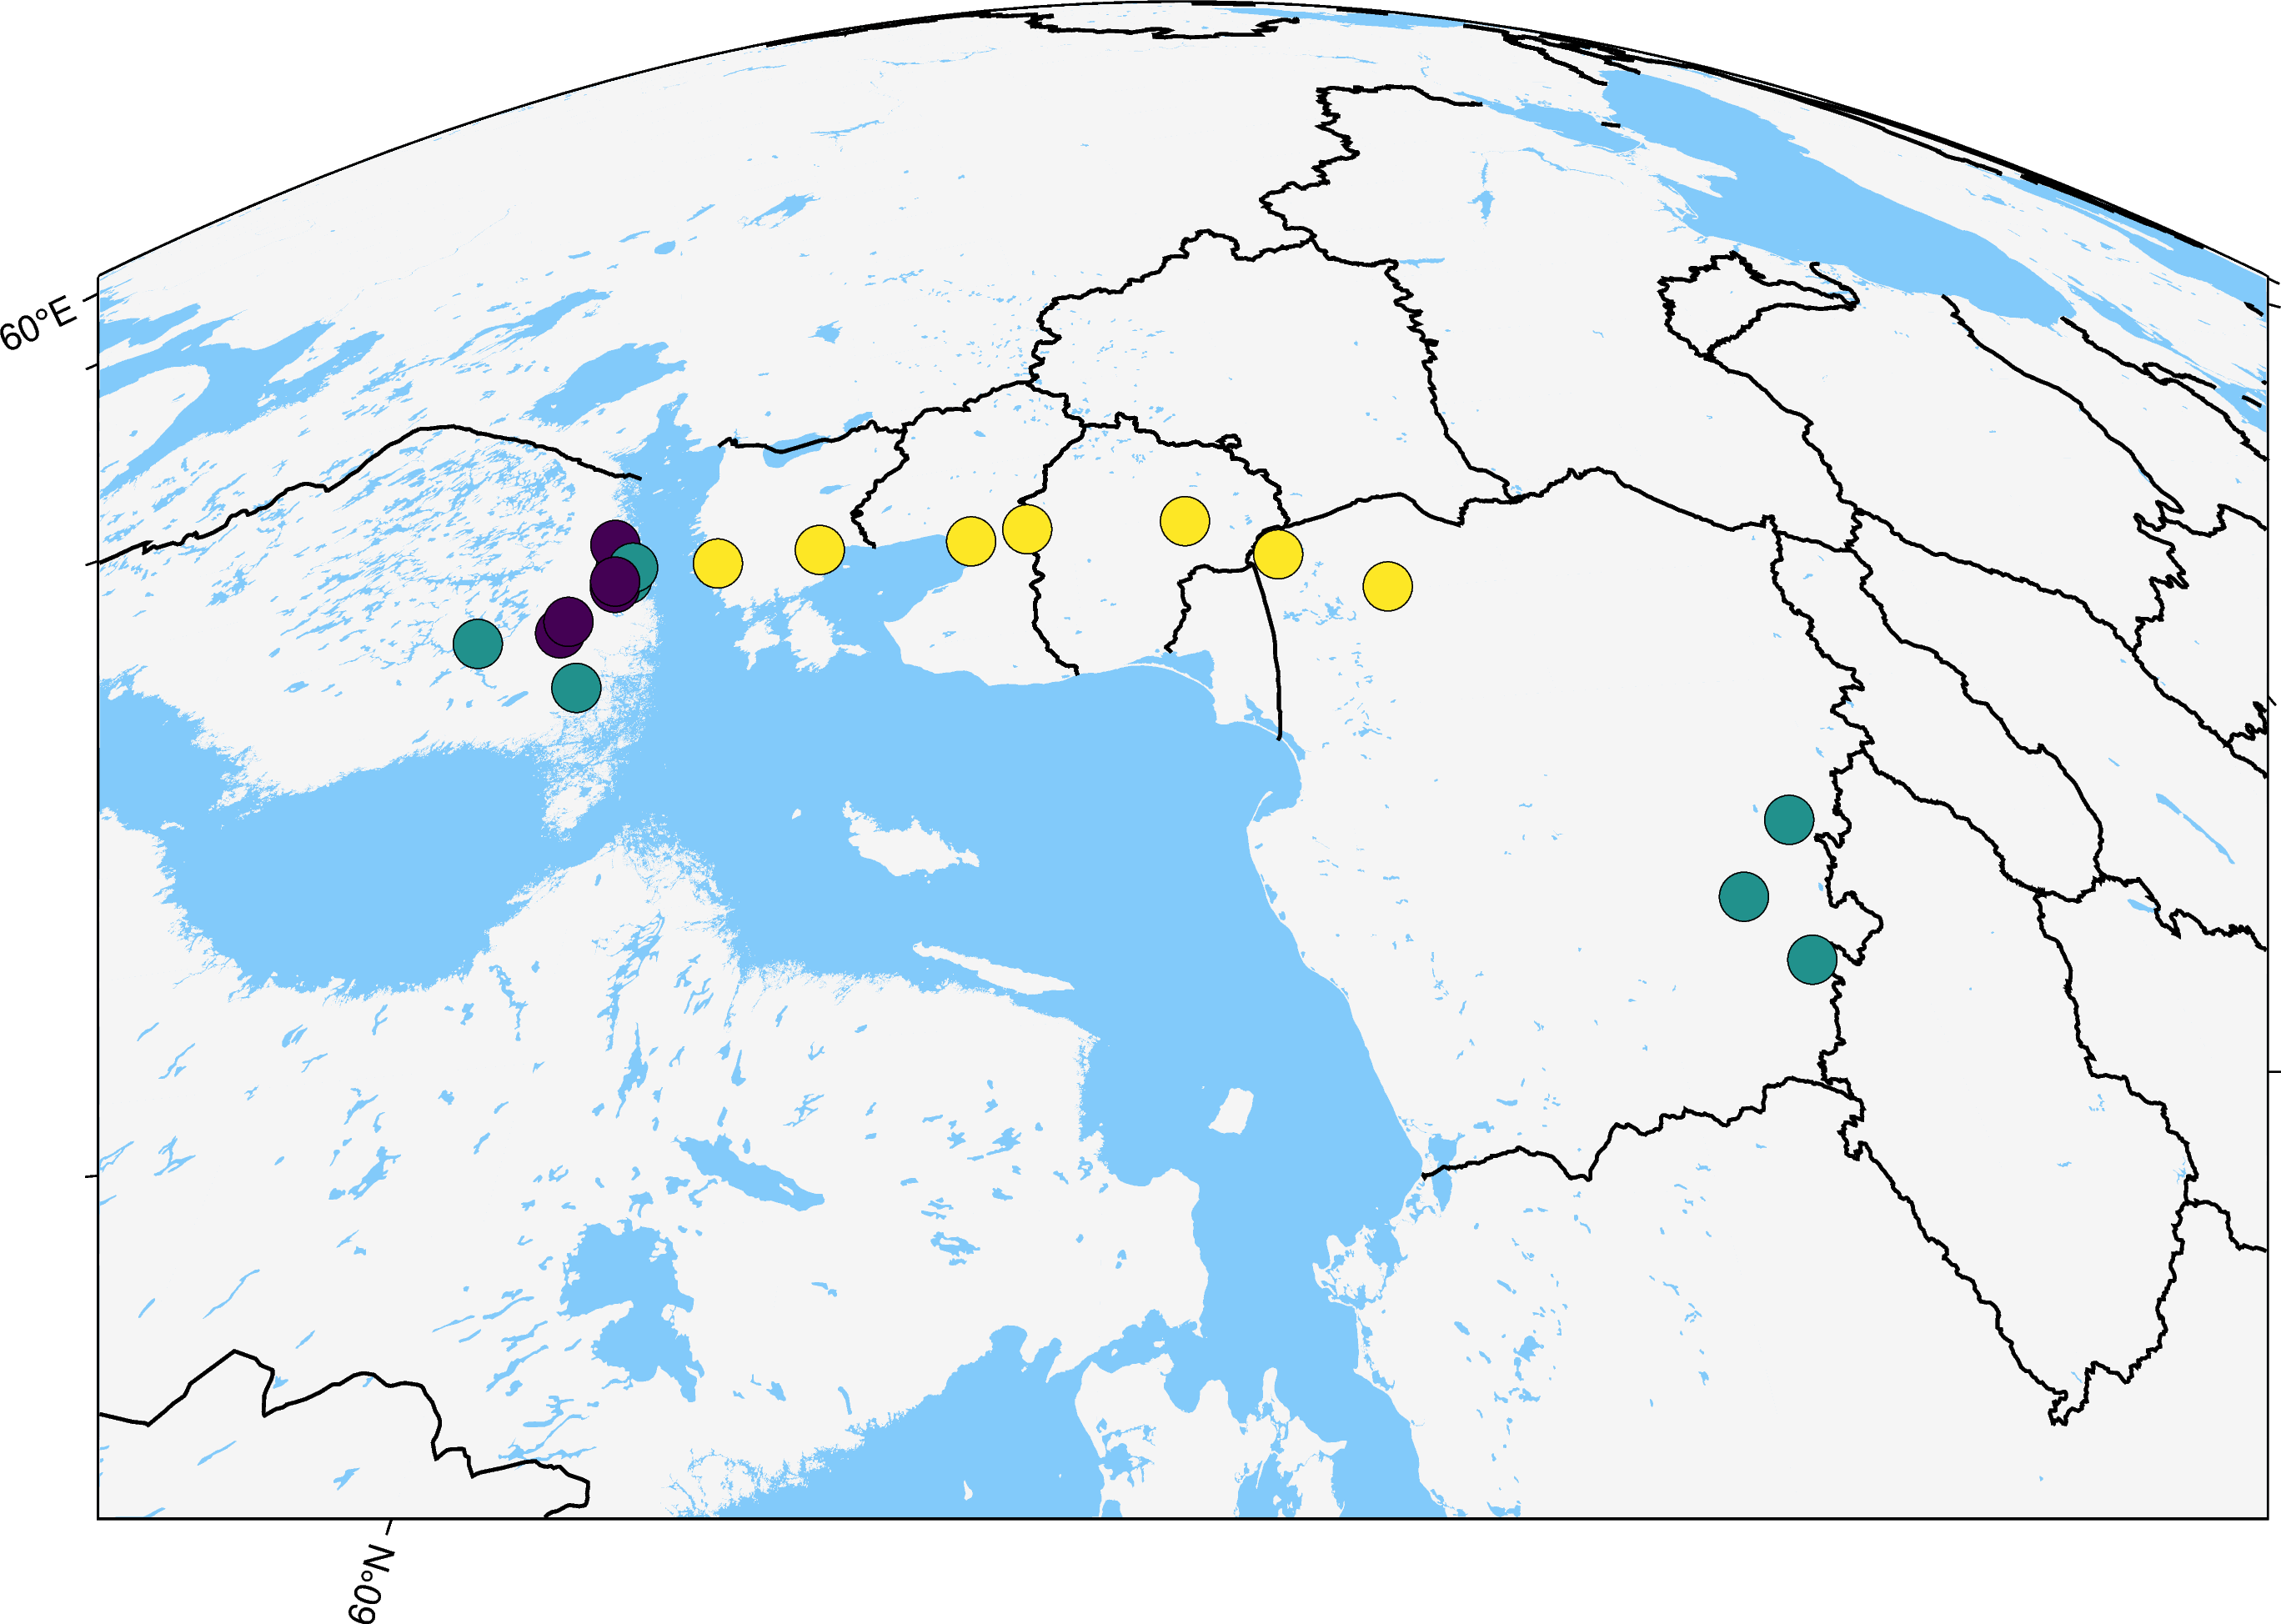

In [26]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="G12/55.5/22c+a90+t40+v60/60+w0+z1000", frame=True)
fig.coast(land="#F5F5F5", water="#82CAFA", borders='1/1p')
pygmt.makecpt(cmap="viridis", series=[df['Val'].min(), df['Val'].max()])
fig.plot(
    x=df.Longitude,
    y=df.Latitude,
    fill=df['Val'],
    cmap=True,
    style="c0.5c",
    pen="black",
)
fig.savefig('our_travels_2022.png')
fig.show()